# MVP Comunidad Valenciana

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold

pd.options.display.max_columns = None

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio_com_valencia.xlsx')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1


In [3]:
data.shape

(47122, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47122 entries, 0 to 47121
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Installation Date       47122 non-null  datetime64[ns]
 1   Installation Number     47122 non-null  int64         
 2   Client Type             47122 non-null  object        
 3   Panel                   47122 non-null  object        
 4   Territorial             47122 non-null  object        
 5   Provincia               47122 non-null  object        
 6   Zip                     47122 non-null  int64         
 7   Gender                  47122 non-null  object        
 8   Nationality             47122 non-null  object        
 9   Country Of Birth        47122 non-null  object        
 10  Born Date               46903 non-null  datetime64[ns]
 11  Housing Type            47122 non-null  object        
 12  Labor Situation         47122 non-null  object

In [5]:
data.isnull().sum()

Installation Date           0
Installation Number         0
Client Type                 0
Panel                       0
Territorial                 0
Provincia                   0
Zip                         0
Gender                      0
Nationality                 0
Country Of Birth            0
Born Date                 219
Housing Type                0
Labor Situation             0
Marital Status              0
Income Amount               0
Number Pay                  0
Price List                  0
Monitoring Status Date      0
Monitoring Status           0
Financiado                  0
Rango Kit                   0
Resumen Precio              0
Kit Contado                 0
Kit Total                   0
Kit Mensualidad             0
Quejas                      0
dtype: int64

In [6]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print("Número de Filas:", df.shape[0])
    print("\nNúmero de Columnas:", df.shape[1])
    print("\nColumnas:\n")
    print(data.columns.tolist())
    print("\nValores nulos:", df.isnull().sum().values.sum())
    print("\nValores únicos:\n")
    print(df.nunique())

In [7]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 47122

Número de Columnas: 26

Columnas:

['Installation Date', 'Installation Number', 'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Price List', 'Monitoring Status Date', 'Monitoring Status', 'Financiado', 'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total', 'Kit Mensualidad', 'Quejas']

Valores nulos: 219

Valores únicos:

Installation Date          2108
Installation Number       47107
Client Type                   2
Panel                         2
Territorial                   1
Provincia                     3
Zip                         619
Gender                        2
Nationality                  11
Country Of Birth            134
Born Date                 18728
Housing Type                  5
Labor Situation               8
Marital Status                6
Income Amount        

In [8]:
data['Quejas'] = data['Quejas'].replace(np.nan, 0).astype('int')
data['Installation Number'] = data['Installation Number'].astype('str')
data['Zip'] = data['Zip'].astype('str')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1


In [9]:
data.describe()

,Income Amount,Number Pay,Monitoring Status,Kit Contado,Kit Total,Kit Mensualidad,Quejas
count,4.712200e+04,47122.000000,47122.000000,47122.000000,47122.000000,47122.000000,47122.000000
mean,4.646419e+04,12.926192,0.103773,104.256462,476.082042,9.940092,0.312678
std,5.530653e+06,1.066588,0.304969,101.965057,111.858025,1.556542,0.939987
min,1.000000e+00,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,0.000000,49.000000,409.000000,10.000000,0.000000
50%,1.500000e+03,12.000000,0.000000,79.000000,459.000000,10.000000,0.000000
75%,2.000000e+03,14.000000,0.000000,199.000000,559.000000,10.000000,0.000000
max,1.000000e+09,16.000000,1.000000,999.000000,4529.000000,99.000000,23.000000


In [12]:
# sns.set_style(style = 'darkgrid')

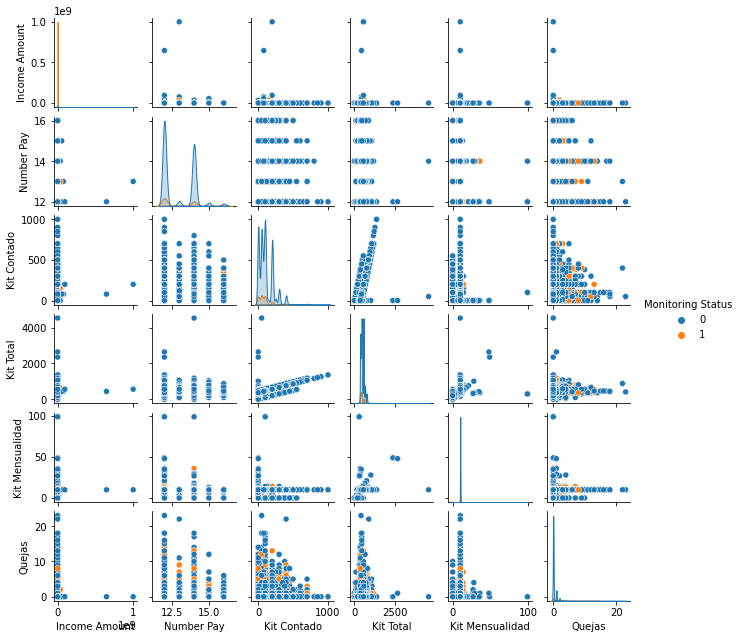

In [10]:
# Don´t do this!!!!

# sns.pairplot(data = data, diag_kind = 'kde', hue = 'Monitoring Status', height = 1.5);

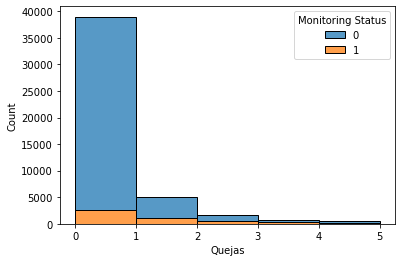

In [11]:
sns.histplot(data = data, x="Quejas", hue = 'Monitoring Status', multiple="stack",
             binwidth=1,  binrange = (0,5));

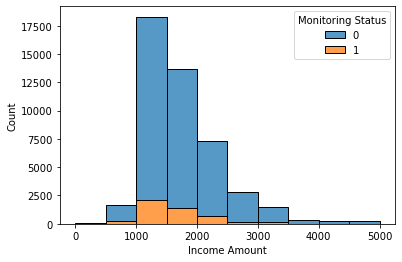

In [12]:
sns.histplot(data = data, x="Income Amount", hue = 'Monitoring Status', multiple="stack", binrange = (0,5000), bins = 10);

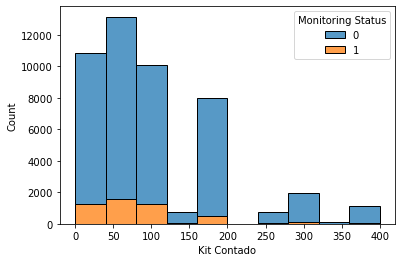

In [18]:
sns.histplot(data = data, x="Kit Contado", hue = 'Monitoring Status', multiple="stack", binrange = (0,400), bins = 10);

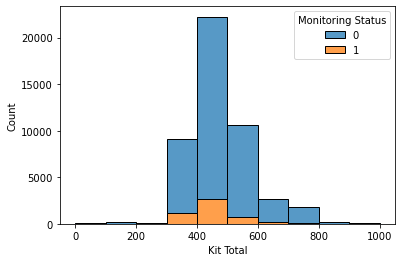

In [20]:
sns.histplot(data = data, x="Kit Total", hue = 'Monitoring Status', multiple="stack", binrange = (0,1000), bins = 10);

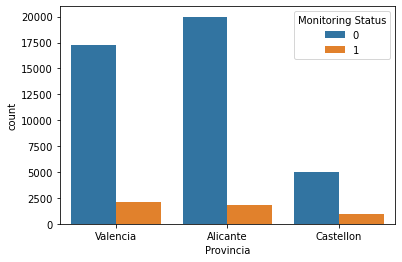

In [21]:
sns.countplot(x="Provincia", hue = 'Monitoring Status',data = data);

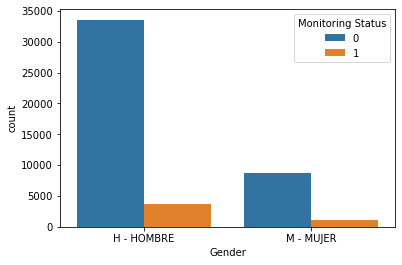

In [22]:
sns.countplot(x="Gender", hue = 'Monitoring Status',data = data);

In [23]:
corr = data.corr()
corr

,Income Amount,Number Pay,Monitoring Status,Kit Contado,Kit Total,Kit Mensualidad,Quejas
Income Amount,1.000000,-0.001321,-0.002296,0.003002,0.002108,0.000300,-0.002382
Number Pay,-0.001321,1.000000,-0.042674,0.012938,-0.007171,-0.000605,-0.017876
Monitoring Status,-0.002296,-0.042674,1.000000,-0.068171,-0.077803,-0.003623,0.230826
Kit Contado,0.003002,0.012938,-0.068171,1.000000,0.861237,-0.080272,-0.041664
Kit Total,0.002108,-0.007171,-0.077803,0.861237,1.000000,0.108016,-0.053775
Kit Mensualidad,0.000300,-0.000605,-0.003623,-0.080272,0.108016,1.000000,-0.015452
Quejas,-0.002382,-0.017876,0.230826,-0.041664,-0.053775,-0.015452,1.000000


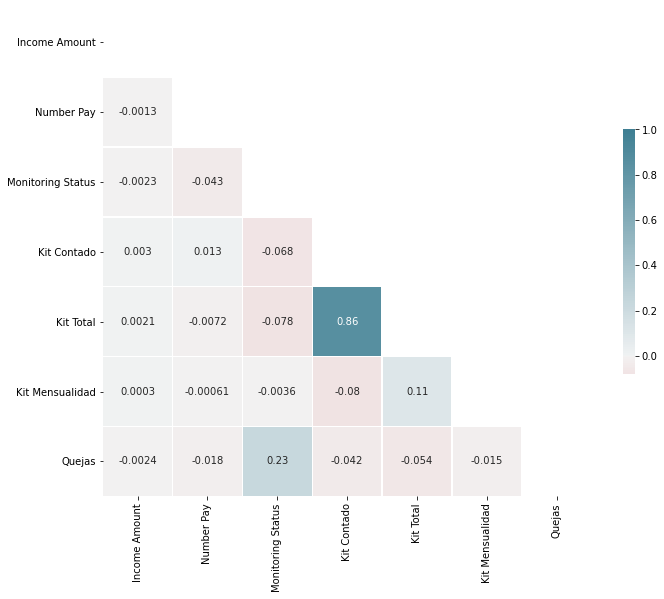

In [24]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Funciones

In [25]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

def evaluate(classifier, features, target):
    
    X_train, X_test, y_train, y_test = train_test_split(features, target)
    classifier.fit(X_train, y_train)

    predictions = classifier.predict(X_test)
    probabilities = classifier.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    auc = roc_auc_score(y_test, probabilities)
    fpr, tpr, threshold = roc_curve(y_test, probabilities)
    
    plt.plot(fpr, tpr)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.gcf().set_size_inches(8, 6)
    
    return acc, f1, auc

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Activo and Baja for 0 and 1    
class_names = ['Activo','Baja']

In [27]:
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1


## Baseline: Sin variables categóricas

In [28]:
data_filtered = data[['Quejas', 'Monitoring Status']]
data_filtered.head()

,Quejas,Monitoring Status
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0


In [29]:
X = data_filtered.iloc[:, :-1]
y = data_filtered.iloc[:, 1]

In [30]:
X

,Quejas
0,0
1,0
2,0
3,1
4,1
...,...
47117,0
47118,0
47119,0
47120,0


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [33]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90      8447
           1       0.28      0.48      0.36       978

    accuracy                           0.82      9425
   macro avg       0.61      0.67      0.63      9425
weighted avg       0.87      0.82      0.84      9425



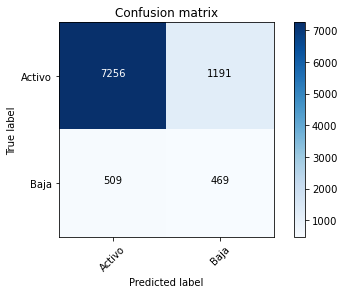

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.8253968253968254, 0.3409163729573854, 0.6703956092860632)

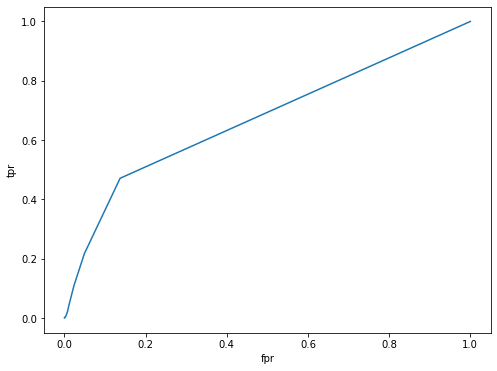

In [35]:
evaluate(classifier, X, y)

Average precision-recall score: 0.19


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.19')

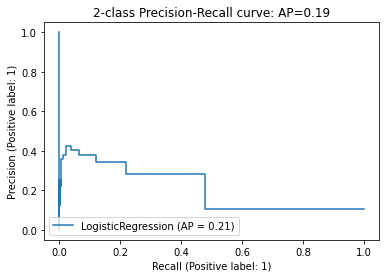

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## New features

- Edad en Años
- Rango de Income Amount
- Días Activo

Rangos de Edad:

In [37]:
data.columns

Index(['Installation Date', 'Installation Number', 'Client Type', 'Panel',
       'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality',
       'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Price List',
       'Monitoring Status Date', 'Monitoring Status', 'Financiado',
       'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total',
       'Kit Mensualidad', 'Quejas'],
      dtype='object')

In [38]:
data['Born Date'].isnull().sum()

219

In [39]:
data['Born Date'] = data['Born Date'].replace(np.nan, datetime(1970, 1, 1))

data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1


In [40]:
data['Born Date'].isnull().sum()

0

In [41]:
# Edad actual si OP y edad cuando se dio de baja si BAJA

data['Edad'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Born Date'])):
    if data.loc[i, 'Monitoring Status'] == 0:
        data.loc[i,'Edad'] = ((fecha - data.loc[i,'Born Date']).days)/365
    else:
        data.loc[i,'Edad'] = ((data.loc[i,'Monitoring Status Date'] - data.loc[i,'Born Date']).days)/365
                        
data.head()

# data.loc[i,'Edad'] = ((data.loc[i,'Monitoring Status Date'] - data.loc[i,'Born Date']).dt.days.astype(float))/365

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,Edad
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0,49.082192
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,31.353425
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,57.679452
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1,61.545205
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1,45.816438


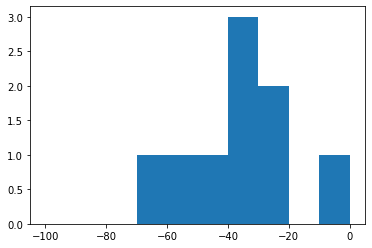

In [42]:
plt.hist(data['Edad'], range = (-100,0));

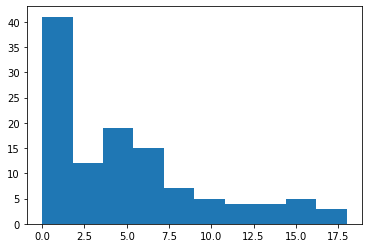

In [43]:
plt.hist(data['Edad'], range = (0,18));

In [44]:
data['Edad'].mean()

53.5287188080136

In [45]:
for i in range(len(data['Edad'])):
    if data.loc[i, 'Edad'] < 18:
        data.loc[i, 'Edad'] = data['Edad'].mean()
    else:
        continue

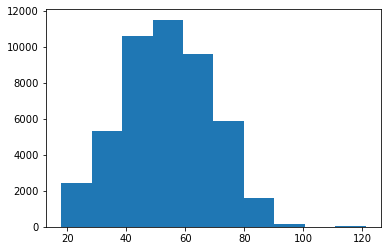

In [46]:
plt.hist(data['Edad']);

In [47]:
# Mapping Edad 
data.loc[data['Edad'] <= 30, 'Rango_Edad'] = "18-30"
data.loc[(data['Edad'] > 30) & (data['Edad'] <= 40), 'Rango_Edad'] = "30-40"
data.loc[(data['Edad'] > 40) & (data['Edad'] <= 50), 'Rango_Edad'] = "40-50"
data.loc[(data['Edad'] > 50) & (data['Edad'] <= 60), 'Rango_Edad'] = "50-60"
data.loc[(data['Edad'] > 60) & (data['Edad'] <= 70), 'Rango_Edad'] = "60-70"
data.loc[(data['Edad'] > 70) & (data['Edad'] <= 80), 'Rango_Edad'] = "70-80"
data.loc[data['Edad'] > 80, 'Rango_Edad'] = "+80"
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,Edad,Rango_Edad
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0,49.082192,40-50
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,31.353425,30-40
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,57.679452,50-60
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1,61.545205,60-70
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1,45.816438,40-50


In [48]:
tab1 = pd.crosstab(data["Rango_Edad"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Rango_Edad"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,0,1,All,0,1
Rango_Edad,,,,,
+80,1632,120,1752,0.931507,0.068493
18-30,2633,306,2939,0.895883,0.104117
30-40,4885,1039,5924,0.824612,0.175388
40-50,9158,1468,10626,0.861848,0.138152
50-60,10075,1002,11077,0.909542,0.090458
60-70,8552,645,9197,0.929868,0.070132
70-80,5297,310,5607,0.944712,0.055288
All,42232,4890,47122,0.896227,0.103773


Rangos de Income Amount:

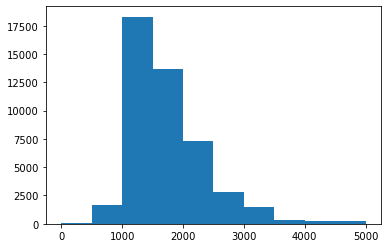

In [49]:
plt.hist(data['Income Amount'], range=(0, 5000));

In [50]:
# Mapping Income Amount
data.loc[data['Income Amount'] <= 1000, 'Income'] = "0-1000"
data.loc[(data['Income Amount'] > 1000) & (data['Income Amount'] <= 1500), 'Income'] = "1000-1500"
data.loc[(data['Income Amount'] > 1500) & (data['Income Amount'] <= 2000), 'Income'] = "1500-2000"
data.loc[(data['Income Amount'] > 2000) & (data['Income Amount'] <= 3000), 'Income'] = "2000-3000"
data.loc[data['Income Amount'] > 3000, 'Income'] = "+3000"
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,Edad,Rango_Edad,Income
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0,49.082192,40-50,2000-3000
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,31.353425,30-40,1000-1500
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,57.679452,50-60,1500-2000
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1,61.545205,60-70,1000-1500
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1,45.816438,40-50,1500-2000


In [51]:
tab1 = pd.crosstab(data["Income"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Income"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,0,1,All,0,1
Income,,,,,
+3000,1722,173,1895,0.908707,0.091293
0-1000,7216,1092,8308,0.868560,0.131440
1000-1500,19072,2125,21197,0.899750,0.100250
1500-2000,9740,1089,10829,0.899437,0.100563
2000-3000,4482,411,4893,0.916002,0.083998
All,42232,4890,47122,0.896227,0.103773


Días Activo:

In [52]:
# Días hasta el 19/01/2021 si OP y hasta cuando se dio de baja si BAJA

data['Dias_Activo'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Installation Date'])):
    if data.loc[i, 'Monitoring Status'] == 0:
        data.loc[i,'Dias_Activo'] = (fecha - data.loc[i,'Installation Date']).days
    else:
        data.loc[i,'Dias_Activo'] = (data.loc[i,'Monitoring Status Date'] - data.loc[i,'Installation Date']).days
                        
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,Edad,Rango_Edad,Income,Dias_Activo
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0,49.082192,40-50,2000-3000,2199
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,31.353425,30-40,1000-1500,2199
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,57.679452,50-60,1500-2000,2199
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1,61.545205,60-70,1000-1500,1845
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1,45.816438,40-50,1500-2000,2199


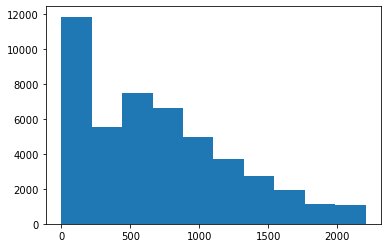

In [53]:
plt.hist(data['Dias_Activo']);

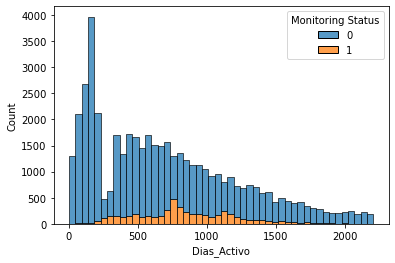

In [54]:
sns.histplot(data = data, x = 'Dias_Activo', hue = 'Monitoring Status', multiple = 'stack')

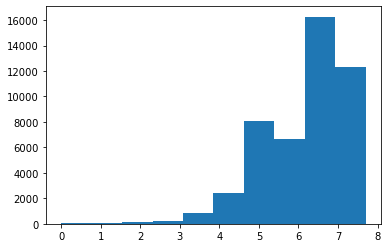

In [55]:
plt.hist(np.log1p(data['Dias_Activo']));

In [56]:
data['Dias_Activo_log'] = np.log1p(data['Dias_Activo'])
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_log
0,2015-01-12,1835558,Normal,SDVFAST,Este,Valencia,46900,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1972-01-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2009,12,HBE,2015-01-14,0,Financiado,A 0,0+(36*10),0,360,10,0,49.082192,40-50,2000-3000,2199,7.696213
1,2015-01-12,1835654,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1989-09-20,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,1 - SOLTERO,1500,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,31.353425,30-40,1000-1500,2199,7.696213
2,2015-01-12,1835683,Normal,SDVFAST,Este,Valencia,46716,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1963-05-31,1 - PROPIEDAD SIN HIPOTECA,01 ASALARIADO FIJO,2 - CASADO,2000,12,EED,2015-01-13,0,Financiado,Entre 000-050,49+(36*10),49,409,10,0,57.679452,50-60,1500-2000,2199,7.696213
3,2015-01-12,1835716,Normal,SDVFAST,Este,Alicante,3110,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1958-07-31,2 - PROPIEDAD HIPOTECADA,03 FUNCIONARIO,4 - SEPARADO/DIVORCIADO,1400,12,HBD,2020-01-31,1,Financiado,Entre 050-100,99+(36*10),99,459,10,1,61.545205,60-70,1000-1500,1845,7.520776
4,2015-01-12,1835728,Normal,SDVFAST,Este,Valencia,46394,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1975-04-08,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2000,12,HBE,2015-01-13,0,Financiado,A 0,0+(36*10),0,360,10,1,45.816438,40-50,1500-2000,2199,7.696213


## Enconding con ``get_dummies``

In [57]:
data.columns

Index(['Installation Date', 'Installation Number', 'Client Type', 'Panel',
       'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality',
       'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Price List',
       'Monitoring Status Date', 'Monitoring Status', 'Financiado',
       'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total',
       'Kit Mensualidad', 'Quejas', 'Edad', 'Rango_Edad', 'Income',
       'Dias_Activo', 'Dias_Activo_log'],
      dtype='object')

In [58]:
data_filtered = data[['Gender', 'Housing Type', 'Labor Situation', 'Marital Status', 'Provincia', 'Nationality',
                      'Rango_Edad', 'Income', 'Dias_Activo_log', 'Rango Kit', 'Quejas', 'Monitoring Status']]
data_filtered.columns

Index(['Gender', 'Housing Type', 'Labor Situation', 'Marital Status',
       'Provincia', 'Nationality', 'Rango_Edad', 'Income', 'Dias_Activo_log',
       'Rango Kit', 'Quejas', 'Monitoring Status'],
      dtype='object')

In [59]:
Gender = pd.get_dummies(data = data_filtered['Gender'],prefix = "Gender")
House = pd.get_dummies(data = data_filtered['Housing Type'],prefix = "House")
Labor = pd.get_dummies(data = data_filtered['Labor Situation'],prefix = "Labor")
Marital = pd.get_dummies(data = data_filtered['Marital Status'],prefix = "Marital")
Provincia = pd.get_dummies(data = data_filtered['Provincia'],prefix = "Provincia")
Nationality = pd.get_dummies(data = data_filtered['Nationality'],prefix = "Nationality")
Edad = pd.get_dummies(data = data_filtered['Rango_Edad'],prefix = "Rango_Edad")
Income = pd.get_dummies(data = data_filtered['Income'],prefix = "Income")
Kit = pd.get_dummies(data = data_filtered['Rango Kit'],prefix = 'Rango_Kit')

In [60]:
data_filtered.drop(['Gender','Housing Type','Labor Situation','Provincia', 
                    'Nationality', 'Marital Status', 'Rango_Edad', 'Rango Kit', 'Income'],axis=1,inplace=True)

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
dummy_df = pd.concat([data_filtered,Gender,House,Labor,Marital,Provincia,Nationality,Edad,Income,Kit],axis=1)
dummy_df.columns

Index(['Dias_Activo_log', 'Quejas', 'Monitoring Status', 'Gender_H - HOMBRE',
       'Gender_M - MUJER', 'House_1 - PROPIEDAD SIN HIPOTECA',
       'House_2 - PROPIEDAD HIPOTECADA', 'House_3 - ALQUILER',
       'House_4 - FAMILIARES/PADRES', 'House_5 - EMPRESA',
       'Labor_01 ASALARIADO FIJO', 'Labor_02 ASALARIADO TEMPORAL',
       'Labor_03 FUNCIONARIO', 'Labor_04 AUTONOMO', 'Labor_06 PARADO',
       'Labor_07 PENSIONISTA (JUBILACION)', 'Labor_08 PENSIONISTA (VIUDEDAD)',
       'Labor_09 PENSIONISTA (LARGA ENFERMEDAD)', 'Marital_1 - SOLTERO',
       'Marital_2 - CASADO', 'Marital_3 - VIUDO',
       'Marital_4 - SEPARADO/DIVORCIADO', 'Marital_5 ? PAREJA DE HECHO',
       'Marital_5 â PAREJA DE HECHO', 'Provincia_Alicante',
       'Provincia_Castellon', 'Provincia_Valencia',
       'Nationality_AF - AFRICA MENOS MAGREB',
       'Nationality_AJ - AUSTRALIA Y JAPON',
       'Nationality_AS - ASIA MENOS JAPON', 'Nationality_ES - ESPAÃOLA',
       'Nationality_ES - ESPAÑOLA', 'Nationa

In [62]:
dummy_df.head()

,Dias_Activo_log,Quejas,Monitoring Status,Gender_H - HOMBRE,Gender_M - MUJER,House_1 - PROPIEDAD SIN HIPOTECA,House_2 - PROPIEDAD HIPOTECADA,House_3 - ALQUILER,House_4 - FAMILIARES/PADRES,House_5 - EMPRESA,Labor_01 ASALARIADO FIJO,Labor_02 ASALARIADO TEMPORAL,Labor_03 FUNCIONARIO,Labor_04 AUTONOMO,Labor_06 PARADO,Labor_07 PENSIONISTA (JUBILACION),Labor_08 PENSIONISTA (VIUDEDAD),Labor_09 PENSIONISTA (LARGA ENFERMEDAD),Marital_1 - SOLTERO,Marital_2 - CASADO,Marital_3 - VIUDO,Marital_4 - SEPARADO/DIVORCIADO,Marital_5 ? PAREJA DE HECHO,Marital_5 â PAREJA DE HECHO,Provincia_Alicante,Provincia_Castellon,Provincia_Valencia,Nationality_AF - AFRICA MENOS MAGREB,Nationality_AJ - AUSTRALIA Y JAPON,Nationality_AS - ASIA MENOS JAPON,Nationality_ES - ESPAÃOLA,Nationality_ES - ESPAÑOLA,Nationality_IB - IBEROAMERICA,Nationality_MA - MAGREB,Nationality_OT - OTROS,Nationality_RE - RESTO DE EUROPA,Nationality_UE - UNION EUROPEA,Nationality_US - USA / CANADA,Rango_Edad_+80,Rango_Edad_18-30,Rango_Edad_30-40,Rango_Edad_40-50,Rango_Edad_50-60,Rango_Edad_60-70,Rango_Edad_70-80,Income_+3000,Income_0-1000,Income_1000-1500,Income_1500-2000,Income_2000-3000,Rango_Kit_A 0,Rango_Kit_Entre 000-050,Rango_Kit_Entre 050-100,Rango_Kit_Entre 100-200,Rango_Kit_Entre 200-300,Rango_Kit_Mas de 300
0,7.696213,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,7.696213,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,7.696213,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,7.520776,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,7.696213,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [63]:
X = dummy_df.drop(['Monitoring Status'],axis=1).values
y = dummy_df['Monitoring Status'].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

Logistic Accuracy is 0.71
Cross Validation Score = 0.64
              precision    recall  f1-score   support

           0       0.96      0.71      0.81      8447
           1       0.22      0.71      0.34       978

    accuracy                           0.71      9425
   macro avg       0.59      0.71      0.58      9425
weighted avg       0.88      0.71      0.77      9425



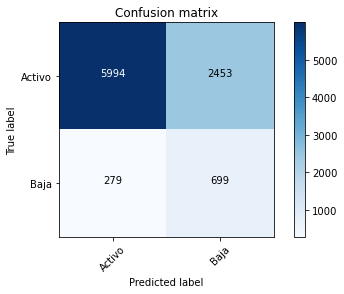

In [65]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 0, max_iter=1000, class_weight="balanced")
LR.fit(X_train,y_train) 
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_LR = cross_val_score(LR, X, y, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_LR)

y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.7105508870214753, 0.3474933027171833, 0.7890475070361235)

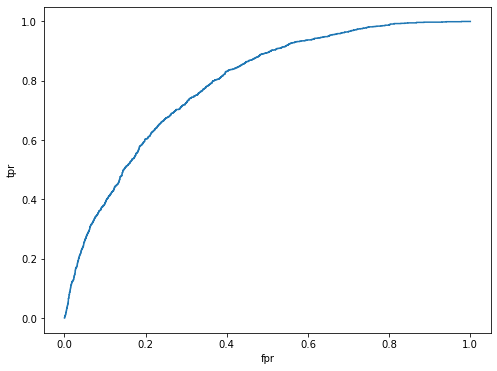

In [66]:
evaluate(LR, X, y)

Average precision-recall score: 0.19


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.19')

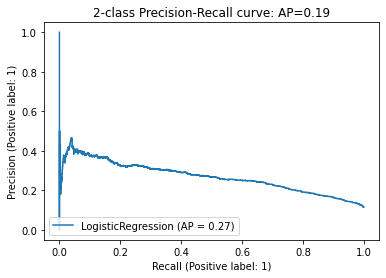

In [67]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(LR, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# Don´t do this!!!

from sklearn.model_selection import GridSearchCV

classifier = GridSearchCV(KNeighborsClassifier(),
                      param_grid = {'n_neighbors':np.arange(3,15,2)},
                      scoring = 'recall')

classifier.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13])},
             scoring='recall')

In [69]:
classifier.best_params_

AttributeError: 'LogisticRegression' object has no attribute 'best_params_'

In [70]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [71]:
y_pred = classifier.predict(X_test)

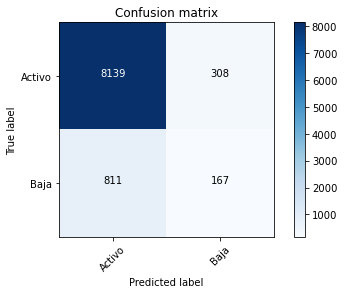

In [72]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      8447
           1       0.35      0.17      0.23       978

    accuracy                           0.88      9425
   macro avg       0.63      0.57      0.58      9425
weighted avg       0.85      0.88      0.86      9425



(0.8798064680417622, 0.2378902045209903, 0.6553785655926749)

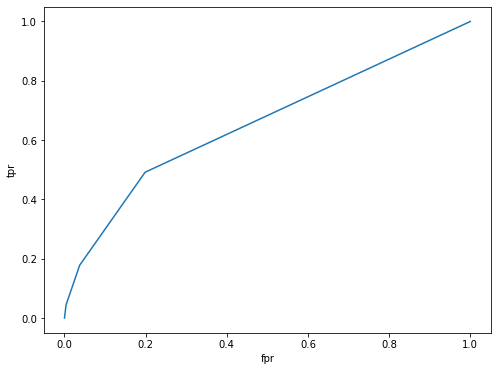

In [74]:
evaluate(classifier, X, y)

Average precision-recall score: 0.15


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.15')

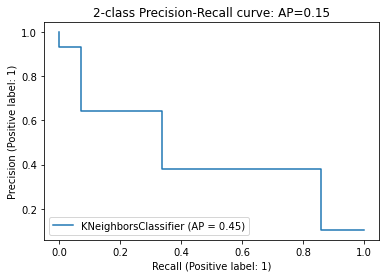

In [75]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Decission Tree Classifier

Decision Tree Accuracy is 0.73
Cross Validation Score = 0.39
              precision    recall  f1-score   support

           0       0.96      0.73      0.83      8447
           1       0.24      0.73      0.36       978

    accuracy                           0.73      9425
   macro avg       0.60      0.73      0.60      9425
weighted avg       0.89      0.73      0.78      9425



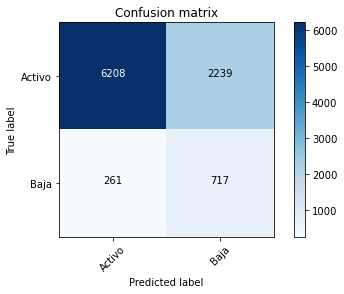

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

skf = StratifiedKFold(n_splits=20)
score_DT = cross_val_score(DT, X, y, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_DT)

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.7304982599100246, 0.36052366565961735, 0.8119442289872087)

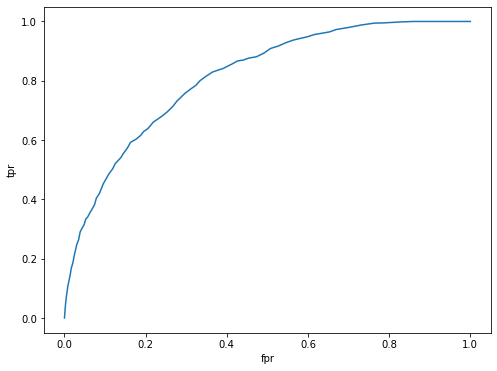

In [77]:
evaluate(DT, X, y)

Average precision-recall score: 0.21


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.21')

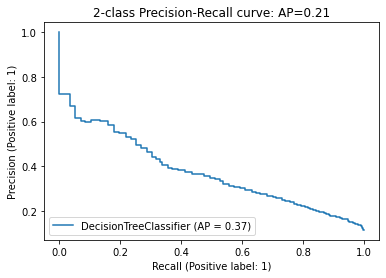

In [78]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(DT, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Random Forest Classifier

Random Forest Accuracy is 0.87
Cross Validation Score = 0.78
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      8447
           1       0.39      0.46      0.42       978

    accuracy                           0.87      9425
   macro avg       0.66      0.69      0.67      9425
weighted avg       0.88      0.87      0.87      9425



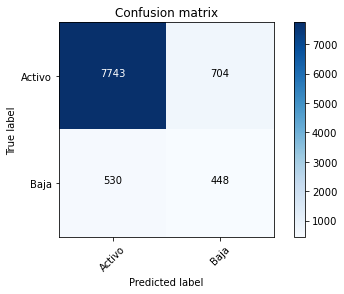

In [79]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

skf = StratifiedKFold(n_splits=20)
score_rfc = cross_val_score(rfc, X, y, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

(0.8685171038112215, 0.39937960449786736, 0.8186662182132198)

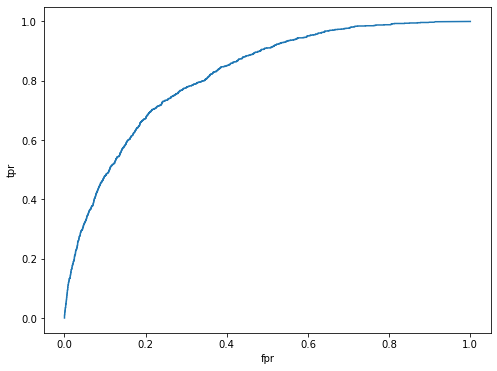

In [80]:
evaluate(rfc, X, y)

Average precision-recall score: 0.23


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.23')

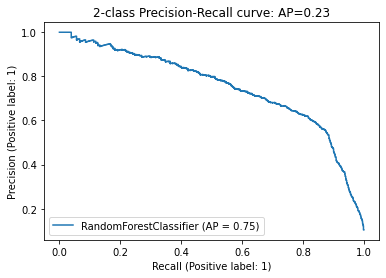

In [81]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

disp = plot_precision_recall_curve(rfc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Feature importances

In [83]:
from sklearn.feature_selection import RFE

# Using Recursive Feature Elimination Function and fitting it in a Logistic Regression Model
modell = LogisticRegression(max_iter=1000, class_weight="balanced")
rfe = RFE(modell, 5)
rfe = rfe.fit(X_train,y_train)
# Displays the feature rank
rfe.ranking_

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ 8,  3, 44, 47, 31, 38, 11,  9, 28, 19, 40, 18, 50,  1, 26, 10, 12,
       41, 24, 49, 15, 30, 37, 39, 21, 42,  6,  1, 51,  1, 35, 34,  2,  1,
       16, 33,  1, 22,  7,  4,  5, 46, 23, 17, 36, 32, 45, 48, 27, 29, 25,
       43, 13, 20, 14])

[4.26984605e-01 1.40929154e-01 1.50831433e-02 1.47795019e-02
 1.02768945e-02 9.39001260e-03 8.07445817e-03 2.36891802e-03
 2.51383169e-03 9.64376588e-03 2.24381922e-03 4.64947663e-03
 1.21170976e-02 4.96577813e-03 5.91248677e-03 1.53415265e-03
 2.17819348e-03 1.12202454e-02 1.13650052e-02 4.42780652e-03
 6.65959141e-03 1.36500485e-03 2.31664396e-06 1.57198235e-02
 1.19453427e-02 1.60898641e-02 7.48050724e-04 2.81081225e-05
 2.18264255e-03 2.22925182e-03 1.23659392e-02 2.61852898e-03
 1.00003578e-03 4.65427476e-03 2.58597535e-03 1.05459266e-02
 2.06890488e-04 3.51496956e-03 7.47274374e-03 1.13183621e-02
 1.15474889e-02 1.20028764e-02 9.50103932e-03 5.74150904e-03
 8.43661474e-03 1.68777192e-02 2.16760592e-02 1.80573257e-02
 1.22520432e-02 1.66493322e-02 1.36718059e-02 1.67794378e-02
 1.01344740e-02 7.59253129e-03 5.16775326e-03]


C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  f

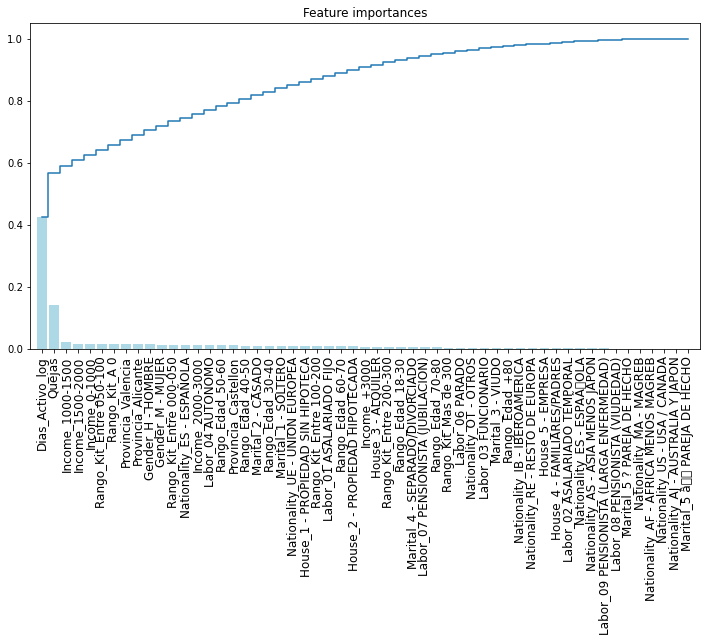

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

# Using ExtraTreesClassifier model function
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = dummy_df.drop(['Monitoring Status'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, len(indices)])
plt.show()